In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_selection import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, settings
import pandas as pd
from sklearn.model_selection import train_test_split

In [72]:
df= pd.read_csv(r'E:\backup\idontknow.csv', nrows=50000)


In [73]:
df.head()

,target,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,0.0,312.500,312.153,312.037,312.037,311.806,311.690,311.690,311.227,311.227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,312.500,311.690,311.690,311.574,311.343,311.227,311.111,310.880,310.764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,309.722,309.259,309.259,309.028,308.796,308.796,308.681,308.449,308.333,...,277.199,278.704,278.125,278.009,279.514,307.986,NaN,NaN,NaN,NaN
3,0.0,308.449,308.218,307.986,307.755,307.523,307.523,307.292,307.292,307.060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,310.764,310.764,310.648,310.417,310.301,310.185,309.954,309.838,309.722,...,285.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df['id'] = 0

In [75]:
k= 0
for i in range(0,len(df)):
    k = k+1
    df.id.iloc[i]= k

C:\Users\srfzx\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
df = df.fillna(0)

In [77]:
df.head()

,target,0,1,2,3,4,5,6,7,8,...,241,242,243,244,245,246,247,248,249,id
0,0.0,312.500,312.153,312.037,312.037,311.806,311.690,311.690,311.227,311.227,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,1
1,0.0,312.500,311.690,311.690,311.574,311.343,311.227,311.111,310.880,310.764,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,2
2,0.0,309.722,309.259,309.259,309.028,308.796,308.796,308.681,308.449,308.333,...,278.704,278.125,278.009,279.514,307.986,0.0,0.0,0.0,0.0,3
3,0.0,308.449,308.218,307.986,307.755,307.523,307.523,307.292,307.292,307.060,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,4
4,0.0,310.764,310.764,310.648,310.417,310.301,310.185,309.954,309.838,309.722,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,5


In [81]:
y = df.target

In [82]:
X = df.drop(['target'],axis=1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=0)

In [86]:
X_test.shape

(779, 251)

In [87]:
X_train = extract_features(X_train, column_id='id', default_fc_parameters=MinimalFCParameters(),
                           impute_function=impute)

Feature Extraction: 100%|██████████████████████| 10/10 [01:08<00:00,  5.91s/it]


In [88]:
X_test = extract_features(X_test, column_id='id', default_fc_parameters=MinimalFCParameters(),
                           impute_function=impute)

Feature Extraction: 100%|██████████████████████| 10/10 [00:35<00:00,  2.91s/it]


In [89]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [91]:
model = clf.fit(X_train,y_train)

In [98]:
X_train.shape

(1581, 2000)

In [99]:
X_train.head()

variable,0__length,0__maximum,0__mean,0__median,0__minimum,0__standard_deviation,0__sum_values,0__variance,100__length,100__maximum,...,99__sum_values,99__variance,9__length,9__maximum,9__mean,9__median,9__minimum,9__standard_deviation,9__sum_values,9__variance
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,312.500,312.500,312.500,312.500,0.0,312.500,0.0,1.0,299.653,...,299.769,0.0,1.0,311.111,311.111,311.111,311.111,0.0,311.111,0.0
3,1.0,309.722,309.722,309.722,309.722,0.0,309.722,0.0,1.0,296.296,...,296.412,0.0,1.0,307.986,307.986,307.986,307.986,0.0,307.986,0.0
4,1.0,308.449,308.449,308.449,308.449,0.0,308.449,0.0,1.0,296.759,...,296.991,0.0,1.0,307.060,307.060,307.060,307.060,0.0,307.060,0.0
5,1.0,310.764,310.764,310.764,310.764,0.0,310.764,0.0,1.0,297.801,...,297.801,0.0,1.0,309.491,309.491,309.491,309.491,0.0,309.491,0.0
8,1.0,312.616,312.616,312.616,312.616,0.0,312.616,0.0,1.0,298.958,...,299.190,0.0,1.0,311.227,311.227,311.227,311.227,0.0,311.227,0.0


In [100]:
y_train.index = X_train.index

In [101]:
predict = model.predict(X_test)

In [102]:
from sklearn.metrics import classification_report

In [111]:
X_train_filtered = select_features(X_test, y_test, fdr_level=0.01)
X_train_filtered.tail()

ValueError: Index of X and y must be identical if provided

## RESULTS

In [113]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       762
         1.0       0.00      0.00      0.00        17

    accuracy                           0.94       779
   macro avg       0.49      0.48      0.49       779
weighted avg       0.96      0.94      0.95       779



In [29]:
from sklearn.metrics import classification_report
#print(classification_report(y_val, predict2))
from sklearn.metrics import classification_report 
#print(classification_report(y_test, predict))
report = classification_report(y_test, predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_latex('mytable.tex')

In [31]:
from sklearn.metrics import confusion_matrix

In [36]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Not Defect ","Defect"]

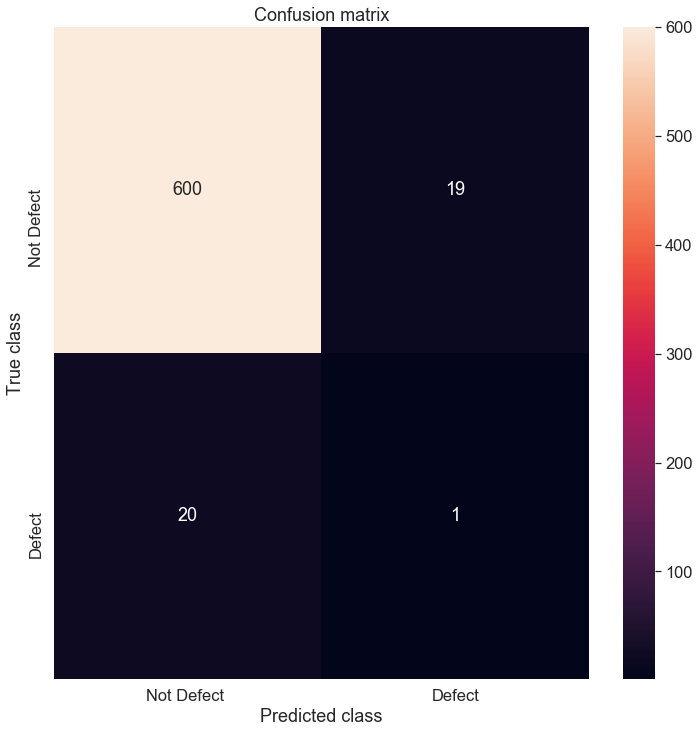

In [37]:
#y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(y_test, predict)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()